In [ ]:
# EDA And Simple Linear Regression With statsmodels

In [24]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

In [25]:
df = pd.read_csv('house_data_washington.csv')

In [26]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
df.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [28]:
# extract year and month info from the string
# create new features 'sales_year' and 'sales_month' in df
df['sales_year'] = df.date.apply(lambda x: int(x[:4]))
df['sales_month'] = df.date.apply(lambda x: int(x[4:6]))
print(df.groupby('sales_month')['id'].count())
print(df.groupby('sales_year')['id'].count())

sales_month
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: id, dtype: int64
sales_year
2014    14633
2015     6980
Name: id, dtype: int64


In [ ]:
# Which month has the most number of sales?

In [29]:
sales_by_month = df.groupby('sales_month')['id'].count()
max_month = sales_by_month.idxmax()
max_month

5

In [30]:
sales_by_month = df.groupby('sales_month')['id'].count()
min_month = sales_by_month.idxmin()
min_month

1

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [32]:
for c in df2.columns[2:]:
    print(c, df2[c].unique())

price [ 221900  538000  180000 ...  610685 1007500  402101]
bedrooms [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
bathrooms [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
sqft_living [1180 2570  770 ... 3087 3118 1425]
sqft_lot [ 5650  7242 10000 ...  5813  2388  1076]
floors [1.  2.  1.5 3.  2.5 3.5]
waterfront [0 1]
view [0 3 4 2 1]
condition [3 5 4 1 2]
grade [ 7  6  8 11  9  5 10 12  4  3 13  1]
sqft_above [1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 2390  880 1040  910 3450 2350 1900 1010
  960 2660 1610  765 3520 1290 1960 1160 1210 1270 1440 2190 2920 1460
 1170 1240 3140 2030 2310  700 1080 2520 2780 1560 1450 1

Let's drop features that are unnecessary. id is not a meaningful feature. date string has been coded to sales_month and sales_year, so we can remove date. zipcode can be also removed as it's hard to include in a linear regressio model and the location info is included in the lat and long. Drop the features id, date, and zipcode 

In [34]:
df.drop([ 'id','date','zipcode'], axis=1, inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,sales_year,sales_month
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


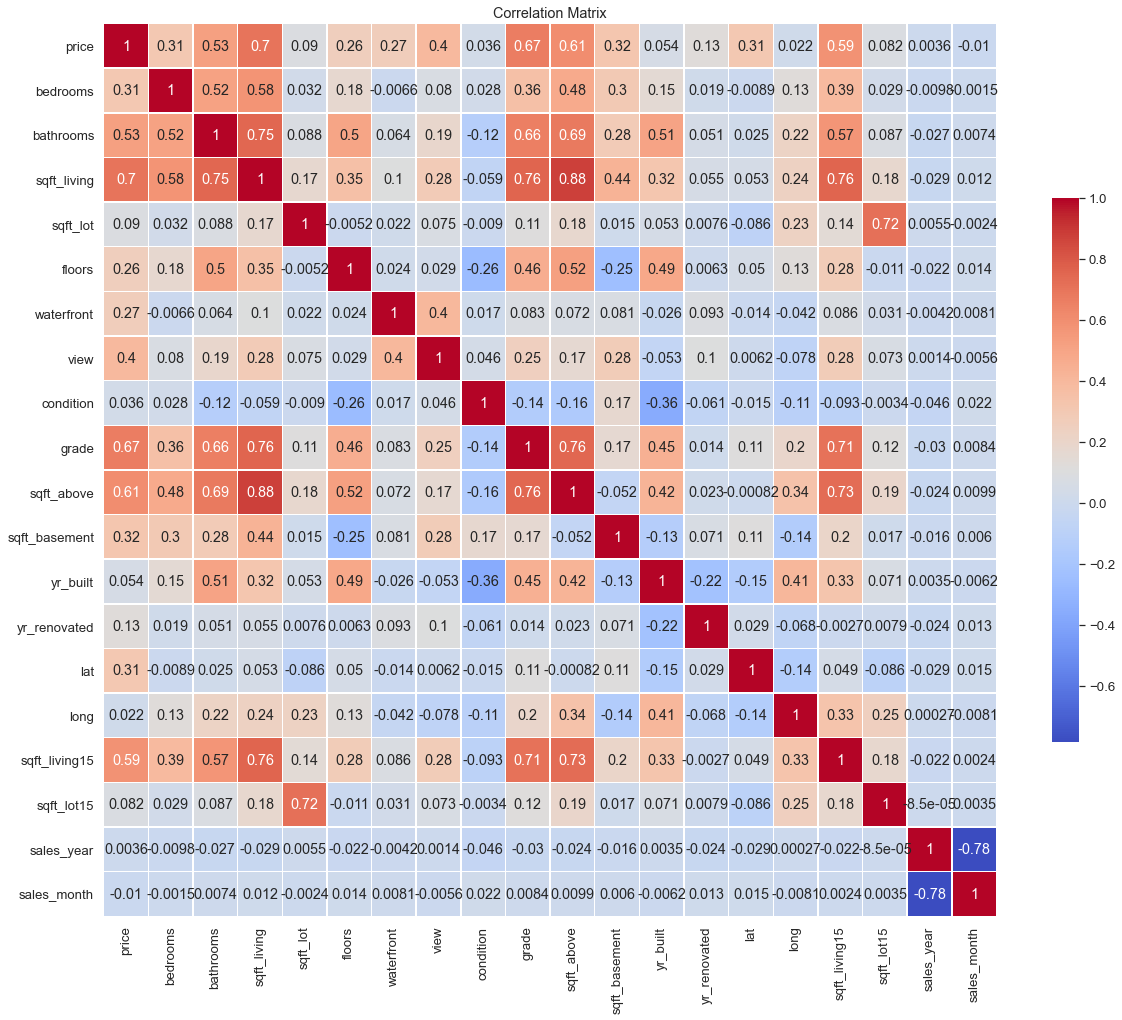

In [35]:
# compute correlation matrix
corr_matrix = df.corr()
# print(corr_matrix)
# create heatmap
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()


C:\Users\mukhek1\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\mukhek1\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


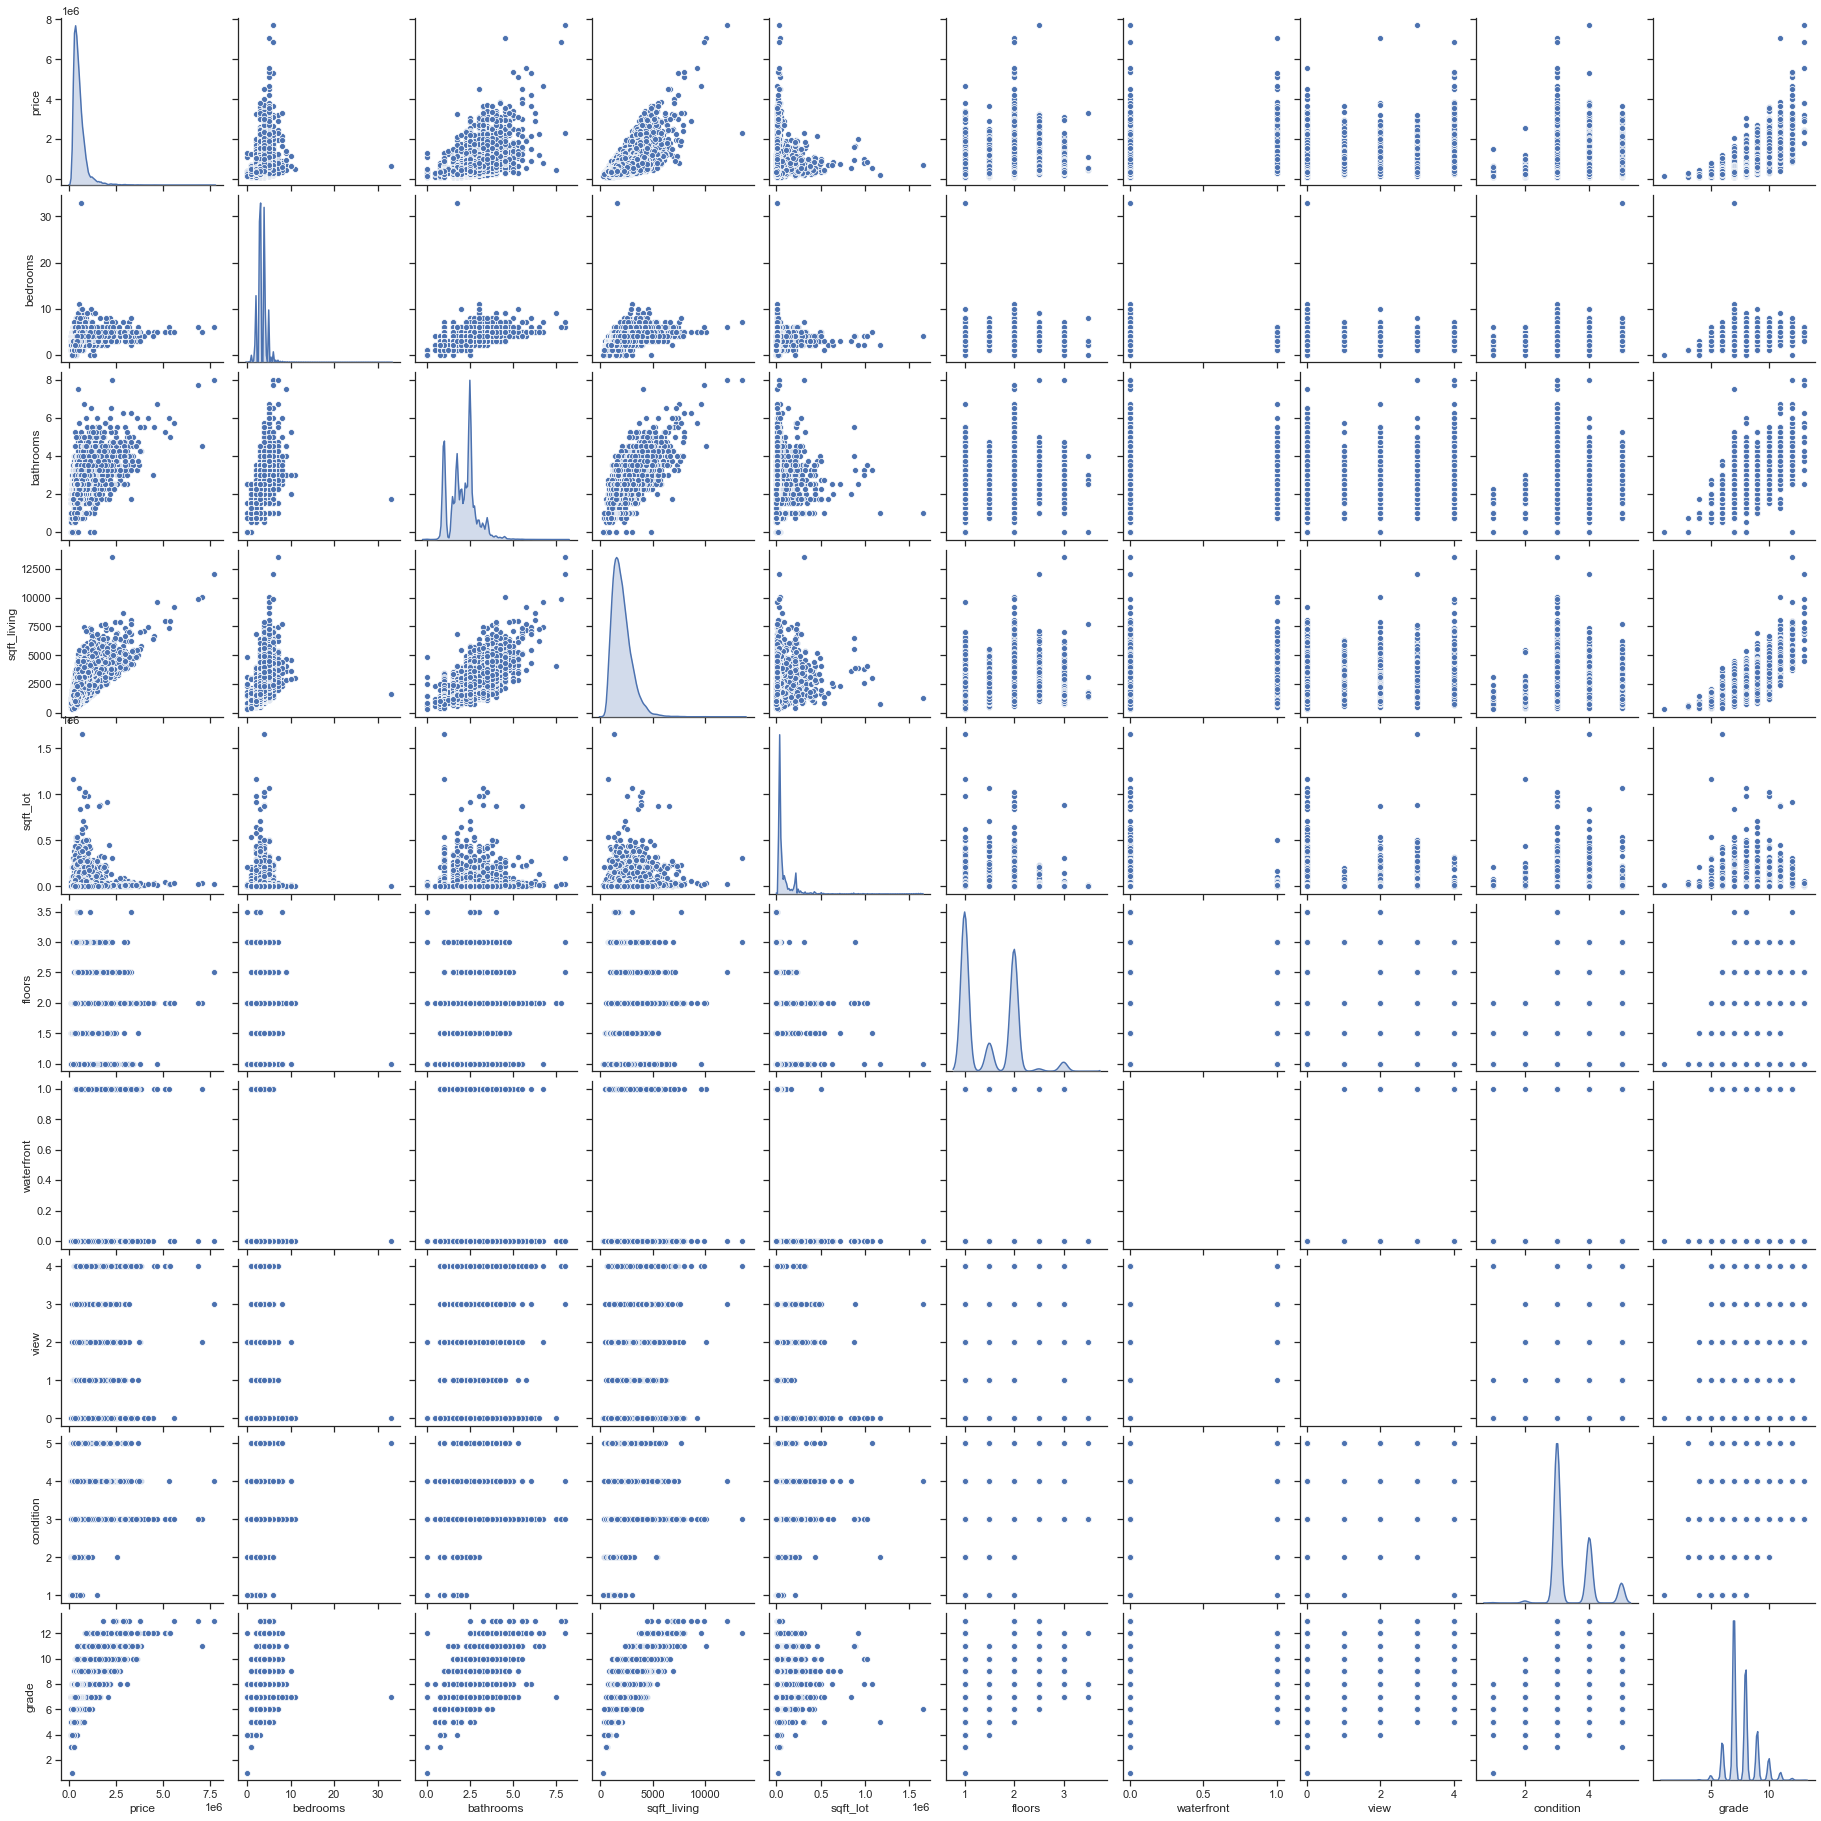

In [36]:
import pandas as pd
import seaborn as sns
# create pairplot
sns.set(style='ticks')
sns.pairplot(df.iloc[:, :10], diag_kind='kde')

In [37]:
# use sklearn.model_selecttion.train_test_split to split the data frame 
# X_train is 80% of the observations; X_test is 20% of the observations
# print length of X_train and X_test


from sklearn.model_selection import train_test_split
import pandas as pd

# separate target variable from features
X = df.drop('price', axis=1)
y = df['price']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print length of X_train and X_test
print(len(X_train))
print(len(X_test))


17290
4323


Train a simple linear regression model

In [38]:
import statsmodels.formula.api as smf

# create a DataFrame with the predictor variable and target variable
df_train = pd.concat([X_train, y_train], axis=1)

# fit a simple linear regression model with sqft_living as predictor
model = smf.ols('price ~ sqft_living', data=df_train).fit()

# print the summary statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.677e+04
Date:                Fri, 14 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:38:22   Log-Likelihood:            -2.3995e+05
No. Observations:               17290   AIC:                         4.799e+05
Df Residuals:                   17288   BIC:                         4.799e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -4.2e+04   4886.778     -8.594      

In [39]:
import statsmodels.formula.api as smf
import pandas as pd

# create a DataFrame with the predictor variable and target variable
df_train = pd.concat([X_train, y_train], axis=1)

# create an empty DataFrame to store adjusted R-squared values
adj_r2_df = pd.DataFrame(columns=['Feature', 'Adjusted_R2'])

# loop through each feature in the DataFrame
for feature in df_train.columns:
    if feature != 'price':
        # fit a linear regression model with the current feature as predictor
        formula = f'price ~ {feature}'
        model = smf.ols(formula=formula, data=df_train).fit()
        
        # append the adjusted R-squared value to the DataFrame
        adj_r2 = model.rsquared_adj
        adj_r2_df = adj_r2_df.append({'Feature': feature, 'Adjusted_R2': adj_r2}, ignore_index=True)

# print the DataFrame sorted by adjusted R-squared values in descending order
print(adj_r2_df.sort_values(by='Adjusted_R2', ascending=False))


          Feature  Adjusted_R2
2     sqft_living     0.492354
8           grade     0.442317
9      sqft_above     0.363880
15  sqft_living15     0.339463
1       bathrooms     0.277284
6            view     0.153700
10  sqft_basement     0.103238
13            lat     0.096526
0        bedrooms     0.094973
4          floors     0.064170
5      waterfront     0.063927
12   yr_renovated     0.016260
3        sqft_lot     0.008231
16     sqft_lot15     0.006208
11       yr_built     0.002353
7       condition     0.001263
14           long     0.000494
18    sales_month     0.000125
17     sales_year     0.000062
